<a href="https://colab.research.google.com/github/JINJA-E/rep4DL/blob/main/ch4_0331_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 영화 리뷰 분류 : 이진 분류
## 3.4.1 IMDB 데이터셋

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data,train_labels), (test_data,test_labels)= imdb.load_data(num_words=10000)
# num_words=10000은 가장 많이 사용하는 단어 1만개만 사용하겠다는 뜻

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
for i, j in enumerate(train_data):
  print(i,j)

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 501

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



12219 [1, 675, 158, 158, 1300, 418, 10, 10, 49, 153, 596, 13, 557, 3687, 931, 15, 29, 62, 2, 4, 20, 133, 5, 50, 48, 29, 69, 6, 580, 73, 443, 3687, 13, 482, 164, 9, 404, 21, 14, 20, 295, 19, 2, 1029, 9, 129, 118, 60, 7999, 1421, 73, 11, 14, 31, 10, 10, 51, 188, 72, 91, 9, 4, 1882, 7, 4, 65, 5, 453, 538, 40, 14, 575, 5, 9, 131, 1448, 11, 4, 182]
12220 [1, 13, 974, 15, 4, 2159, 7, 14, 22, 16, 3658, 21, 13, 16, 131, 2176, 12, 47, 6, 389, 281, 7, 9829, 1708, 752, 856, 228, 5, 4, 372, 11, 4, 22, 2, 4478, 533, 225, 57, 2, 133, 13, 70, 104, 7, 4193, 7, 85, 108, 15, 71, 96, 433, 33, 222, 14, 31, 69, 35, 1774, 2, 367, 19, 49, 1031, 1702, 36, 2, 8, 89, 4, 1248, 2033, 19, 2, 2, 2330, 285, 11, 1682, 60, 48, 12, 817, 4, 84, 335, 424, 8, 30, 1907, 82, 89, 1824, 1647, 1164, 70, 30, 237, 33, 15, 213, 9431, 2, 8, 1778, 4959, 468, 8, 589, 8, 4516, 27, 908, 157, 865, 724, 6280, 7, 609, 11, 35, 781, 8, 820, 4392, 23, 98, 29, 1196, 21, 407, 24, 3605, 40, 6, 612, 7, 84, 62, 28, 25, 104, 13, 28, 6, 1796, 1466

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1, 4, 52, 10, 10, 1134, 1399, 4090, 52, 1352, 350, 2501, 270, 365, 73, 4054, 1683, 4508, 5, 6225, 10, 10, 4, 78, 10, 10, 527, 4183, 7, 156, 19, 32, 1683, 156, 8571, 6028, 1427, 19, 477, 939, 4, 1683, 156, 168, 60, 433, 74, 374, 1628, 39, 6, 171, 153, 596, 3048, 2091, 6, 1463, 2, 287, 56, 5, 57, 31, 2, 12, 57, 31, 66, 60, 1204, 12, 5, 50, 9, 57, 1823, 17, 8, 138, 4, 558, 2, 16, 60, 177, 46, 885, 16, 50, 101, 282, 138, 29, 215, 81, 142, 17, 7682, 17, 2, 6361, 10, 10, 4, 1558, 10, 10, 373, 229, 38, 111, 1744, 4763, 19, 99, 111, 1008, 15, 26, 24, 1314, 1706, 4, 807, 16, 220, 1322, 33, 49, 757, 1526, 105, 5, 687, 15, 26, 24, 887, 753, 105, 6361, 9, 424, 8, 30, 14, 736, 21, 684, 59, 16, 43, 6, 736, 8, 4, 564, 50, 9, 164, 8, 41, 59, 9, 2502, 5, 357, 8, 106, 59, 47, 57, 2327, 57, 2, 41, 109, 47, 57, 1653, 2432, 11, 192, 50, 9, 24, 31, 109, 11, 4, 436, 22, 37, 47, 101, 1288, 101, 6693, 1371, 4, 578, 31, 7, 2, 101, 3666, 36, 26, 815, 5, 1815, 3708, 50, 26, 57, 9926, 4, 1317, 8, 268, 487, 2, 80,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [1, 4, 22, 626, 33, 4, 380, 7, 3076, 2, 2, 199, 8930, 38, 619, 8, 380, 6, 8638, 19, 141, 1835, 10, 10, 4, 22, 186, 8, 1735, 1700, 21, 272, 40, 35, 4072, 212, 18, 3076, 10, 10, 2, 49, 356, 5786, 39, 4, 22, 2, 2, 13, 92, 391, 8, 462, 33, 27, 217, 42, 1415, 282, 29, 271, 3165, 27, 452, 11, 4, 2059, 249, 173, 9, 54, 29, 7622, 6, 1003, 7, 6301, 29, 941, 4, 1003, 11, 27, 2879, 63, 461, 194, 5, 166, 90, 168, 2755, 13, 377, 11, 61, 1548, 61, 1750, 579, 72, 4, 172, 975, 2, 17, 6, 506, 13, 1498, 33, 12, 15, 58, 21, 133, 10, 10, 4, 226, 22, 9, 6, 975, 191, 1260, 75, 28, 6301, 11, 6, 2, 217, 31, 922, 5, 1155, 5, 2, 395, 4, 2, 322, 5, 2, 4, 2, 75, 82, 28, 7970, 2, 137, 2, 395, 4, 492, 7, 2, 2, 37, 199, 548, 23, 37, 47, 4, 249, 5764, 10, 10, 458, 9, 5903, 228, 9, 78, 10, 10, 6301, 497, 254, 272, 99, 154, 11, 4, 1155, 217, 5, 99, 185, 11, 4, 922, 217, 246, 52, 781, 2, 9, 3927, 2, 99, 9, 864, 2, 9, 78, 2, 4029, 9, 394, 2, 2, 9, 17, 644, 2, 9, 864, 11, 6, 2055]
23144 [1, 13, 535, 4, 172, 2318, 17, 13,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




24838 [1, 4, 114, 9, 4800, 21, 5610, 13, 963, 307, 5, 7006, 322, 7, 3092, 5, 976, 132, 47, 6, 2, 19, 6, 3700, 9675, 95, 497, 8, 1108, 12, 56, 17, 4, 2167, 9229, 5, 2, 41, 21, 51, 3209, 39, 50, 9, 2, 4330, 466, 4, 4697, 15, 26, 1439, 8, 4, 644, 378, 37, 47, 278, 5, 2398, 263, 2, 632, 5, 1886, 977, 8, 28, 64, 31, 4816, 68, 4817, 5, 719, 568, 37, 135, 36, 70, 81, 164, 33, 68, 2, 137, 36, 2, 19, 836, 5, 2573, 36, 28, 57, 1955, 2513, 4005, 64, 6, 3725, 2513, 1510, 15, 36, 2, 4945, 42, 6117, 4005, 2, 525, 24, 60, 684, 4, 2, 8, 3485, 1955, 2161, 4, 5431, 2, 8, 459, 18, 4, 632, 54, 29, 2478, 113, 3556, 2, 1200, 132, 5, 322, 584, 5, 4594, 11, 68, 3025, 263, 1886, 9, 1000, 17, 260, 4, 4081, 7, 6, 2, 5, 263, 632, 6, 2, 9248, 11, 4, 91, 2388, 5, 8641, 1377, 4, 365, 9, 35, 2384, 8, 797, 37, 1053, 68, 58, 19, 14, 3572, 5, 6, 823, 18, 260, 1053, 4, 1956, 7, 2496, 156, 2, 2, 5, 1561, 5354, 51, 71, 36, 536, 5, 902, 23, 2646, 248, 18, 3503, 4, 1663, 7, 94, 311, 18, 14, 5617, 3991]
24839 [1, 308, 2, 499

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#데이터 하나를 영어로 바꾸는 작업

word_index = imdb.get_word_index() # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) #key-value 값 스위칭
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) #0,1,2는 쓸모없는 인덱스이므로 3을 뺌.

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3.4.2 데이터 준비

In [ ]:
#아래에서 사용된 코드 활용법

print('np.zeors(5,5)')
import numpy as np
a = np.zeros((5,5))
print(a)
print('----------------')
a[1,[1,2]]=1. #1번째 인덱스 행(2행), 열 기준, 리스트 내에 있는 인덱스값들을 모두 1로 변환
print(a)
print('=================')
for i, name in enumerate(['body', 'foo', 'bar']):
  print(i, name) #enumerate는 순서가 있는 자료형을 입력받아 인덱스와 함께 리턴한다.

np.zeors(5,5)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
----------------
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0 body
1 foo
2 bar


In [ ]:
#원-핫 인코딩 사용
#정수 시퀀스를 이진 행렬로 인코딩


import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
#레이블은 위와 같은 과정 필요x 쉽게 벡터로 변환 가능(스칼라)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train.shape

(25000,)

## 3.4.3 신경망 모델 만들기

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
#model compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#optimizer=optimizers.RMSprop(lr=0.001)로 옵티마이저를 설정할수있음
#loss=losses.binary_corssentropy, metrics.binary_accuracy로 손실과 측정을 함수 객체로 지정할수도있다

## 3.4.4 훈련 검증

In [ ]:
#검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킨다.= (x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복한다)

동시에 따로 떼어 놓은 1만개의 샘플에서 손실과 정확도를 측정
: validation_data 매개변수에 검증데이터 전달.

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5189 - accuracy: 0.7889 - val_loss: 0.4018 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3217 - accuracy: 0.8998 - val_loss: 0.3211 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2360 - accuracy: 0.9251 - val_loss: 0.3164 - val_accuracy: 0.8731
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1885 - accuracy: 0.9395 - val_loss: 0.2762 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1562 - accuracy: 0.9497 - val_loss: 0.2836 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1267 - accuracy: 0.9605 - val_loss: 0.2944 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1076 - accuracy: 0.9680 - val_loss: 0.2987 - val_accuracy: 0.8862
Epoch 8/20
30

In [ ]:
history

In [ ]:
history_dict=history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

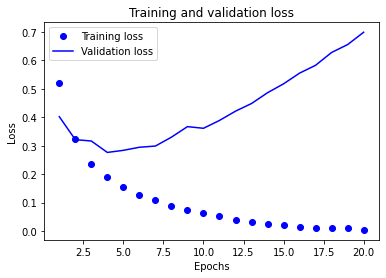

In [ ]:
#훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

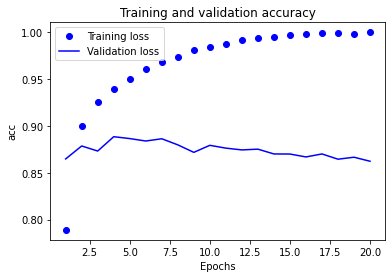

In [ ]:
#훈련과 검증 정확도 그리기

plt.clf()
acc = history_dict['accuracy']
val_acc=history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크 마다 증가한다 -> 기대했던 대로!

하지만, 검증 손실과 정확도는 이와 같지 않다.
훈련세트에서 잘 작동하는 모델이 처음보는 데이터에서는 잘 작동하지 않음 

==> 오버피팅! 이라고함.(과대적합)

훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못함.




In [ ]:
#모델을 처음부터 다시 훈련

model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4474 - accuracy: 0.8240
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2619 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2033 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2952 - accuracy: 0.8829


In [ ]:
results

[0.2951904535293579, 0.8829200267791748]

In [ ]:
model.predict(x_test)

array([[0.21480033],
       [0.9999012 ],
       [0.76492965],
       ...,
       [0.07378927],
       [0.05489424],
       [0.49116153]], dtype=float32)

# 3.5 뉴스 기사분류 : 다중 분류 문제



## 로이터 데이터셋
1986년에 로이터에서 공개한 짧은 뉴스기사와 토픽의 집합이다.
* 46개의 토픽
* 8982 training, 2246 test samples.
* 

In [2]:
#로이터 데이터셋 로드하기

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#num_words 매개변수는 데이터에서 가장 자주 등장하는 단어 1만개로 제한한다.

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
#샘플 개수 확인
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
#데이터 생김새 확인
for i in range(0,11):
  print(len(train_data[i]))

87
56
139
224
101
116
100
100
82
106
31


In [5]:
train_data 
#각 샘플은 정수 리스트(단어 인덱스)이다.

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [6]:
print(len(train_labels))
train_labels #토픽의 인덱스로, 0과 45사이의 정수이다.

8982


array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
#텍스트로 디코딩하는 과정
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 3.5.2 데이터 준비

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


내장 함수를 사용하지 않고 레이블을 인코딩하는 방법

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


## 3.5.3 모델 구성

출력 클래스의 개수가 이전 예제에서와 달리 2개에서 46개로 증가했다.

* 왜 46? -> 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들것이기 때문에.
 
이전 층의 출력에서 제공한 정보만 사용할 수 있다.

* 즉,어떤 층에서 정보를 누락할 시에 '정보의 병목'현상이 일어날 수 있음.

이전 예제에서 16차원 공간은 46개의 클래스를 구분하기에 너무 작다

* 규모가 큰 층을 사용 - 64개의 유닛을 사용해보자

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #softmax층 : 46개의 확률 점수가 들어 있는 배열을 반환.(모두 더하면 1)
                                                  #다시 말해, 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력
                                                  #또 다시 말해, 46차원의 출력 벡터를 만들며 output[i]는
                                                  #어떤 샘플이 클래스 i에 속할 확률을 의미한다!
                                      

In [15]:
#model compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#categorical_crossentropy는 두 확률 분포 사이의 거리를 측정한다.
#두 분포란, 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리를 의미.

## 3.5.4 훈련 검증

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
#훈련 데이터에서 1000개의 샘플을 따로 떼서 검증 세트로 사용하겠다.

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 59ms/step - loss: 2.6507 - accuracy: 0.5296 - val_loss: 1.7851 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4623 - accuracy: 0.6942 - val_loss: 1.3609 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0909 - accuracy: 0.7637 - val_loss: 1.1777 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8518 - accuracy: 0.8178 - val_loss: 1.0457 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6758 - accuracy: 0.8601 - val_loss: 0.9657 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5343 - accuracy: 0.8914 - val_loss: 0.9801 - val_accuracy: 0.7780
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4307 - accuracy: 0.9117 - val_loss: 0.8749 - val_accuracy: 0.8110
Epoch 8/20
16

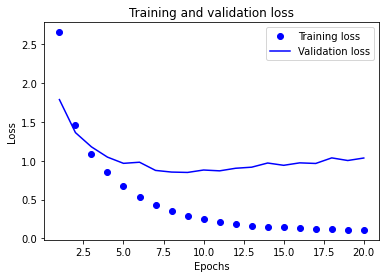

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

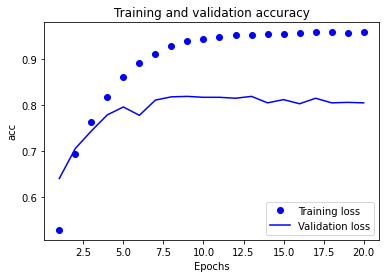

In [21]:
#훈련과 검증 정확도 그리기

plt.clf()
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

아홉번째 에포크 이후에 과대적합이 시작되므로,
아홉 번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가해보겠음.

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 2.7254 - accuracy: 0.5243 - val_loss: 1.7737 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4385 - accuracy: 0.7042 - val_loss: 1.3286 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0676 - accuracy: 0.7741 - val_loss: 1.1554 - val_accuracy: 0.7430
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8404 - accuracy: 0.8216 - val_loss: 1.0535 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6617 - accuracy: 0.8599 - val_loss: 0.9774 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5286 - accuracy: 0.8904 - val_loss: 0.9278 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4251 - accuracy: 0.9128 - val_loss: 0.8989 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

[0.9925229549407959, 0.7943009734153748]

이 문제는 불균형한 데이터셋을 사용하므로 무작위로 분류하면? -> 18%정도 달성

In [23]:
import copy
import numpy as np
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1798753339269813

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions

array([[2.74196151e-04, 5.55317674e-04, 2.01602215e-05, ...,
        1.83948723e-05, 2.68220520e-05, 1.19063461e-05],
       [1.18219210e-02, 2.53569242e-02, 1.82662322e-03, ...,
        2.10559256e-06, 3.63606148e-07, 5.92049735e-04],
       [2.30343523e-03, 8.02037716e-01, 1.46482075e-02, ...,
        3.42605636e-05, 1.15734445e-04, 2.69668037e-03],
       ...,
       [7.73603242e-05, 5.36805834e-04, 5.29865429e-05, ...,
        1.87789210e-05, 2.11264880e-04, 4.39863288e-05],
       [3.44732893e-03, 2.96553224e-01, 3.99174541e-03, ...,
        3.49497888e-04, 5.10289101e-04, 1.08139834e-03],
       [2.87734176e-04, 8.06168258e-01, 1.32235978e-02, ...,
        5.96055713e-07, 9.08348884e-05, 1.73468172e-04]], dtype=float32)

In [27]:
predictions.shape #각 항목의 길이가 46인 벡터

(2246, 46)

In [28]:
np.sum(predictions[0]) #벡터의 원소 합은 1


1.0000001

In [29]:
np.argmax(predictions[0]) #가장 큰 값이 예측 클래스

3

# 3.6 주택 가격 예측 : 회귀 문제

In [10]:
from keras.datasets import boston_housing
(train_data, train_targets),(test_data,test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [11]:
train_data.shape

(404, 13)

In [12]:
train_data.shape #404개의 훈련 샘플과 102개의 테스트 샘플, 모두 13개의 수치 특성을 가진다.

(404, 13)

In [13]:
for i in range(0,11):
  print(len(train_data[i]))
print(train_data[0])

#여기서, 13개의 특성은 1인당 범죄율, 주택당 평균 방의 개수, 고속도로 접근성 등이 있다.

13
13
13
13
13
13
13
13
13
13
13
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [14]:
#타깃은 주택의 중간가격으로, 천 단위 달러이다. #1만달러에서 5만달러 사이로형성되어있음.
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 3.6.2 데이터 준비

상이한 스케일을 가진 값을 신경망에 주입하면 문제가 생김
* 특성별로 정규화를 하는 것이다.
* 입력 데이터 행렬의 열, 즉 각 특성에 대해서 평균을 빼고 표준편차로 나눈다.

In [15]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 3.6.3 모델 구성

layers.Dense(1)
* 선형 층이라고 부름. 전형적인 스칼라 회귀를 위한 구성(하나의 연속적인 값을 예측하는 회귀
* 만약 sigmoid 를 활성화험수로 적용하면 출력 값의 범위를 0~1로 제한
* 활성화함수가 없으니까 값의 범위는 어떠한 범위라도 나타남.

loss='mse'
* 예측과 타깃 사이 거리의 제곱.

metrics='mae'
* mae : 평균제곱오차 
* 훈련하는 동안 모니터링을 위해 새로운 지표를 사용하는 것임
* 예측과 타깃 사이의 거리의 절댃값
* 예시로, mae-0.5면 평균적으로 500달러정도 차이가 난다는 뜻


In [20]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

## 3.6.4 K-겹 검증을 사용한 훈련 검증

검증 세트와 훈련세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 달라진다.

검증 세트의 분할에 대한 검증 점수의 분산이 높습니다. -> 신뢰있는 모델 평가가 힘들다.

k-겹 교차 검증
* 데이터를 k개의 분할로 나누고 k개의 모델을 만들어 
* k-1개의 분할에서 훈련하고 나머지 분할에서 평가
* 최종 모델 검증 점수는 k개의 검증 점수 평균

In [22]:
#뭐가 문제일까?

import numpy as np

k=4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples : (i+1)* num_val_samples] #검증 데이터 준비:k번째 분할
  val_targets = train_targets[i * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i* num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  
  model = build_model()
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0


ValueError: ignored

In [23]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [24]:
all_scores

[2.180086135864258, 2.3846611976623535, 2.634744882583618, 2.3789312839508057]

In [26]:
np.mean(all_scores)

2.394605875015259

검증 세트마다 차이가 크다. -> 평균값(2.39)가 훨씬 신뢰할만하다. k-겹 교차 검증의 핵심

신경망을 조금 더 오래 500 에포크 동안 훈련해보자!


In [27]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [28]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [30]:
len(average_mae_history)

500

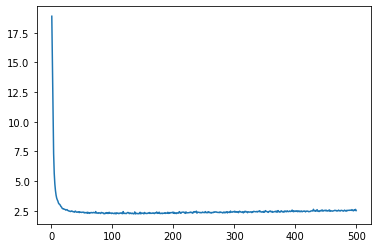

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)

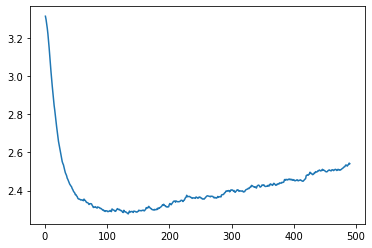

In [32]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.show()

In [35]:
model = build_model()
model.fit(train_data,train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_scores, test_mae_score = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.1108 - mae: 2.6577


In [34]:
test_mae_score

2.796314239501953